**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [ES-7](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/Lab07-TH.ipynb)

___

# <font color=darkred>Laboratory 7: FILE it for later ...  </font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 Lab-7 - In Lab

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-6HAS1BN
desktop-6has1bn\medra
C:\Users\medra\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)



___

## Reading and Writing Files


### Example Reading a Data File to Build a Plot

In this example we will make a contour plot using data in a file at http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/gridded_data.txtthat The data in the file are organized as follows:

    160 240
    -3.0,-2.0,4.5206310380743785e-06
    -2.975,-2.0,5.248940670890073e-06
    -2.95,-2.0,6.086973208643232e-06
    -2.9250000000000003,-2.0,7.049985780998036e-06
    -2.9000000000000004,-2.0,8.155154929062083e-06
    ... many more rows

The first two entries are the row and column count of a rectangular region that we wish to plot the contours. The remaining rows contain the x-,y-, and z-values. The x and y values are the spatial locations where the z values are known. There are a total of 38,400 records in the file - too big to manually enter.

The plotting package needs all the entries on a grid (dumb, but thats what it needs) so we need to read in the xyz data then manipultes it so that there are three 2D structures `X[160][240]`, `Y[160][240]`, and `Z[160][240]` these structures get sent to the contour plotting function.

Step 0: Download the data file to your machine!

- Right-click the link
- Save (target, link, file ...) as ... (This action will differ by machine, OS, and browser!) but goal is to get a copy of the file to your machine.
- Verify you have the file and it is readable (its supposed to be ASCII, so open in an editor and see if it kind of looks like the fragment above, possibly without line feeds

#### Reading a Data File ####

Our first step is to create space to hold the data, then open the file

In [2]:
#%reset -f # only if neccesary

In [4]:
xyzmatrix = [] # null list to hold contents
xyzfile = open("gridded_data.txt","r") # open a read connection

Next we read the first line, and extract the row and column counts

In [5]:
line1 = (xyzfile.readline().split()) # read just the first line
rowNum = int(line1[0]) # extract row count
colNum = int(line1[1]) # extract column count

Next we read the remaining 38,000 lines

In [6]:
for line in xyzfile: # now read rest of the file, line by line
    xyzmatrix.append([float(n) for n in line.strip().split(",")])

So the read is complete, lets close the connection

In [6]:
xyzfile.close()

Now build the structures for plotting, as before we need to allocate space for the data, here we are using a constructor syntax to build matrices of zeros using implied loops.

#### Build 2D Structure for Contour Plot Example ####

In [7]:
xlist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents
ylist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents
zlist = [[0 for j in range(colNum)] for i in range(rowNum)]     # null list to hold contents

Next we will populate the matrices (grids) from the xyzmatrix we just read into the notebook. Notice how we create a counter to keep track of each row of the xyzmatrix and increment the counter as we build the grids.

In [8]:
pointer=0
for irow in range(0,rowNum): 
    for jcol in range(0,colNum):
        xlist[irow][jcol]=(xyzmatrix[pointer][0])
        ylist[irow][jcol]=(xyzmatrix[pointer][1])
        zlist[irow][jcol]=(xyzmatrix[pointer][2])
        pointer += 1

Now finally the plot - using a package called matplotlib which we will study later in the course. For now use it as shown.

#### Build the Plot #####

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

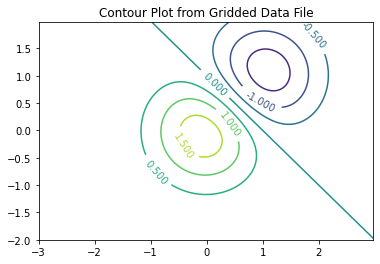

In [9]:
import matplotlib.pyplot
fig, ax = matplotlib.pyplot.subplots()
CS = ax.contour(xlist, ylist, zlist, levels = 7)
ax.clabel(CS, inline=2, fontsize=10)
ax.set_title('Contour Plot from Gridded Data File')
################################

### Example - Reading a Treasure Map

The treasure map problem was already presented, in this example we will replace the explicitly defined map lists with a file, allowing for the use of multiple maps. Starting with our original map, but contained in a text file named http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/treasure1.txt we can read the map using file manipulation methods.

Here is what the file looks like

       c1,c2,c3,c4,c5
    r1,34,21,32,41,25  
    r2,14,42,43,14,31  
    r3,54,45,52,42,23  
    r4,33,15,51,31,35  
    r5,21,52,33,13,23 

The upper left hand corner appears to be 3 spaces, then the remainder of the first row is column headings, which we dont need. Similarily the second row and beyond, has a column of row labels, then the actual data contents.

Step 0: Download the data file to your machine!

- Right-click the link
- Save (target, link, file ...) as ... (This action will differ by machine, OS, and browser!) but goal is to get a copy of the file to your machine.
- Verify you have the file and it is readable (its supposed to be ASCII, so open in an editor and see if it kind of looks like the fragment above, possibly without line feeds

Our reading exercise will need to get just the data and ignore (or discard) the rest of the information.

In [10]:
treasuremap = [] # empty list to the map information
treasurefile = open("treasure1.txt","r") # open a read connection
for line in treasurefile:
    treasuremap.append([str(n) for n in line.strip().split(",")])
treasurefile.close()

Now we have the map, we can use list delete and slicing to remove un-necessary data

In [11]:
del treasuremap[0] #remove entire first row 
for irow in range(len(treasuremap)): #step through remaining rows
    del treasuremap[irow][0] #kill leading column each row

Now we can use our treasure map search to complete the example

In [13]:
#####################################
for i in range(0,5,1):
    what_to_print =','.join(map(repr, treasuremap[i][:]))
    print(what_to_print) # print the map by row
#### Complete Enumeration Search ####
for i in range(0,5,1): # visit the rows
    for j in range(0,5,1): # visit the columns
# get row and column from i and j values
        row = i+1
        column = j+1
# get maprowval and mapcolval
        maprowval = str(treasuremap[row-1][column-1])[0]
        mapcolval = str(treasuremap[row-1][column-1])[1]
# test if cell is a treasure cell or not
        if int(maprowval) == row and int(mapcolval) == column :
            print('Cell ',treasuremap[i][j], ' contains TREASURE ') # print the result
            found = True
            break
            pass #comment this line out when have message
        else:
            #print('Cell ',treasuremap[i][j], ' contains no treasure') # message here for no treasure
            found = False
            pass #comment this line out when have message
    if found: break # exit the search when find first treasure
if not found:
    print("no treasure found after searching all cells")

'34','21','32','41','25'
'14','42','43','14','31'
'54','45','52','42','23'
'33','15','51','31','35'
'21','52','33','13','23'
Cell  52  contains TREASURE 


### Exercise

Consider a new treasure map contained in file http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/treasure2.txt. Modify the program to use this map, and find ALL the treasures (there are two).
Writing Files

### Example

Suppose we read a text file and wish to count how many occurances of A and M appear in the file, then we want to write the result back onto the file.

Here is a test case:

    Updated information
    As simplified by official websites.

The file has 4 A's and 2 M's

The file is located at http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/writing_file.txt

Step 0: Download the data file to your machine!

- Right-click the link
- Save (target, link, file ...) as ... (This action will differ by machine, OS, and browser!) but goal is to get a copy of the file to your machine.
- Verify you have the file and it is readable (its supposed to be ASCII, so open in an editor and see if it kind of looks like the fragment above, possibly without line feeds

Lets process the file and find these values, then we will append a message back to the same file

In [14]:
# As a function
def AMcount(infile):
    file = open(infile,'r')
    data = file.read()
    counta=0
    countm=0
    for letter in data:
        if letter == 'A' or letter =='a':
            counta += 1
        elif letter == 'M' or letter =='m':
            countm += 1
    file.close() # disconnect
    file = open(infile,'a') # open the file to append
    what_to_write = '\n' # write a linefeed
    file.write(what_to_write)
    what_to_write = 'A or a: ' + str(counta) + '\n'
    file.write(what_to_write)
    what_to_write = 'M or m: ' + str(countm) + '\n'
    file.write(what_to_write)
    file.close() # disconnect
    print('A or a:',counta)
    print('M or m:',countm)
    return

In [15]:
# wrapper script
#infile = input('Enter the filename and extension')
infile='writing_file.txt'
AMcount(infile)

A or a: 8
M or m: 6


### Exercise

You have used a text editing software to type some text. After saving the document as **WORDS.TXT**, you realise that she you wrongly typed **J** in place of **I** everywhere in the article.

Write a function definition for **J_TO_I()** in Python that would display the corrected version of entire content of the file **WORDS.TXT** with all the "**J**" to be displayed as an "**I**" and placed back into the original file.

> Obviously a string substitution editor could do this in-place, as could Find/Replace , but the goal here is to get a little practice. The hardest part is likely to be how to write back to the same file to corrected line

The code block below will generate the test file for you to process

In [16]:
# generate original file to manipulate - just run this cell
externalfile = open("WORDS.TXT",'w') # create connection to file, set to append (a), file does not need to exist
externalfile.write('WELL, THJS JS A WORD BY JTSELF. YOU COULD STRETCH THJS TO BE A SENTENCE \n') # add a string including the linefeed
externalfile.close()

The code block below is where you build your script

In [20]:
# read from WORDS.TXT
words = []
wordfile = open("WORDS.TXT","r")
line1 = (wordfile.readline().split())
wordfile.close()
print(line1)

def J_TO_I(myString):
    newString = ""
    for c in myString:
        if c.upper() != "J":
            newString += c
        else:
            newString += "I"
    return newString


line2 = []
for s in line1:
    line2.append(J_TO_I(s))
print(line2)
externalfile = open("WORDS.TXT",'w')
externalfile.write('WELL, THJS JS A WORD JTSELF. YOU COULD STRETCH THJS TO BE A SENTENCE \n')
externalfile.close()


['WELL,', 'THJS', 'JS', 'A', 'WORD', 'JTSELF.', 'YOU', 'COULD', 'STRETCH', 'THJS', 'TO', 'BE', 'A', 'SENTENCE']
['WELL,', 'THIS', 'IS', 'A', 'WORD', 'ITSELF.', 'YOU', 'COULD', 'STRETCH', 'THIS', 'TO', 'BE', 'A', 'SENTENCE']


['WELL,', 'THJS', 'JS', 'A', 'WORD', 'JTSELF.', 'YOU', 'COULD', 'STRETCH', 'THJS', 'TO', 'BE', 'A', 'SENTENCE']
['WELL,', 'THIS', 'IS', 'A', 'WORD', 'ITSELF.', 'YOU', 'COULD', 'STRETCH', 'THIS', 'TO', 'BE', 'A', 'SENTENCE']


['WELL,',
 'THIS',
 'IS',
 'A',
 'WORD',
 'ITSELF.',
 'YOU',
 'COULD',
 'STRETCH',
 'THIS',
 'TO',
 'BE',
 'A',
 'SENTENCE']

___

## References

1. List processing tips [https://www.programiz.com/python-programming/del](https://www.programiz.com/python-programming/del)

2. Character replacement tips [https://www.geeksforgeeks.org/python-string-replace/](https://www.geeksforgeeks.org/python-string-replace/)

3. Python file manipulations [https://www.tutorialspoint.com/python/python_files_io.htm](https://www.tutorialspoint.com/python/python_files_io.htm)

4. Contour Plots [https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html](https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html)

